Kaetlyn Gibson

Math 352

Asst. 1

# The basics: numpy, scipy, sympy

The most important thing to do with this assignment is to get Jupyter Notebook installed and running, so I guess that you've done that if you're looking at this worksheet! Well done.

First of all, let's do some basic stuff with linear algebra.  There's basically 3 libraries where you can find linear algebra routines in python: numpy, scipy, and sympy.  

For playing with row-reduction, sympy will actually have more of what we need than numpy/scipy - they're more focused on applications (so, they'll have a "solve" command for solving systems of linear equations, but most of the math that it's doing is hidden, and it might not even be doing row reduction!)

In [1]:
import numpy as np
# from scipy import linalg
import sympy

For future reference, here's a crash course on how numpy/scipy's linear algebra stuff works.

https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html

And here's some references for sympy:

https://docs.sympy.org/latest/tutorial/matrices.html

In short, there's a shocking amount of powerful mathematics built in to the program, we just have to figure out how to use it. 

# Solving systems

Using sympy, enter the matrix
$$M=
\begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9
\end{bmatrix}
$$
and row-reduce it using the rref() method.  How many free variables and pivots are there?  As a result, how many solutions to the system $Mx=0$ should we expect to find?  Find these solutions with the nullspace() method.

Now, enter the same matrix into numpy, and use numpy's solve() method.  Why does numpy find only one solution, whereas scipy finds all of them?  Is something broken, or is this the intended behavior?


In [2]:
# sympy
M = sympy.Matrix([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(f"Row reduced matrix: \n{M.rref()}") 
# there are 2 pivots, 1 free variable; we should 
# expect infinite solutions for the system due to a
# free variable and a consistent matrix

print(f"\nNullspace: \n{M.nullspace()}")
# complete solution would be
# [[x1],[x2],[x3]] = x3 * [[1],[-2],[1]]
# where x3 is a real number

Row reduced matrix: 
(Matrix([
[1, 0, -1],
[0, 1,  2],
[0, 0,  0]]), (0, 1))

Nullspace: 
[Matrix([
[ 1],
[-2],
[ 1]])]


I'm not quite sure what is happening here (below). I put in both matrix M and the row-reduced matrix. I get singular matrix error (which makes sense) when I use the row-reduced for both scipy and numpy, unless if I use least-squares. If I perform solve on matrix M, I have no singular matrix error, and both answers are the same from scipy and numpy. Results and errors are replicated below. Either way, I am only seeing one solution for numpy and scipy (the trivial solution), not multiple for scipy (referring to "scipy finds all of them"); in other words, not sure how to answer the last two questions.

In [3]:
# numpy
M = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
A = np.array([[1, 0, -1], [0, 1, 2], [0, 0, 0]])
print(A)
b = np.array([[0],[0],[0]])
print(b)
print("")

x1 = np.linalg.solve(M, b)
print(x1,"\n")
x2 = np.linalg.lstsq(A, b, rcond=-1)
print(x2, "\n")
x3 = np.linalg.solve(A, b)
print(x3)

[[ 1  0 -1]
 [ 0  1  2]
 [ 0  0  0]]
[[0]
 [0]
 [0]]

[[ 0.]
 [ 0.]
 [-0.]] 

(array([[0.],
       [0.],
       [0.]]), array([], dtype=float64), 2, array([2.44948974, 1.        , 0.        ])) 



LinAlgError: Singular matrix

In [4]:
from scipy import linalg
M = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
A = np.array([[1, 0, -1], [0, 1, 2], [0, 0, 0]])
print(A)
b = np.array([[0],[0],[0]])
print(b)
print("")

x1 = linalg.solve(M,b)
print(x1, "\n")
x2 = linalg.solve(A,b)
print(x2)

[[ 1  0 -1]
 [ 0  1  2]
 [ 0  0  0]]
[[0]
 [0]
 [0]]

[[ 0.]
 [ 0.]
 [-0.]] 



<ipython-input-4-afe25602cd1d>:9: LinAlgWarning: Ill-conditioned matrix (rcond=2.20282e-18): result may not be accurate.
  x1 = linalg.solve(M,b)


LinAlgError: Matrix is singular.

In [5]:
# also tried the inverse method on M. I get the trivial solution.
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
b = np.array([[0],[0],[0]])
linalg.inv(A).dot(b)


array([[0.],
       [0.],
       [0.]])

# Polynomial interpolation and the vandermonde matrix

If you'll recall Math 351 momentarily, we have a variety of ways of computing interpolating polynomials.  One of them we didn't go into much depth on at the time: it was inverting the so-called *Vandermonde Matrix*.  See the text, page 135.

numpy has a built-in vandermonde matrix command.  Use it to find the unique degree 3 polynomial which passes through the points: (0,0), (1,1), (-1,5), (0.5,0.5).

In [6]:
# construct vandermonde matrix using x values from points
vA = np.vander([0, 1, -1, 0.5], increasing = True)
print(f"Vandermonde Matrix: \n{vA}")
b = np.array([[0], [1], [5], [0.5]])

np.linalg.solve(vA, b)
# p(x) = 0 + 0x + 3x^2 + -2x^3

Vandermonde Matrix: 
[[ 1.     0.     0.     0.   ]
 [ 1.     1.     1.     1.   ]
 [ 1.    -1.     1.    -1.   ]
 [ 1.     0.5    0.25   0.125]]


array([[ 0.],
       [ 0.],
       [ 3.],
       [-2.]])

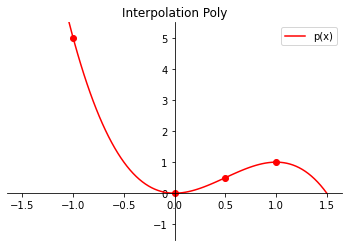

In [7]:
# plot the polynomial for visual purposes
import matplotlib.pyplot as plt 

xpt = np.array([0, 1, -1, 0.5])
ypt = np.array([0, 1, 5, 0.5])

# p(x)
x = np.linspace(-1.5, 1.5, 100)
y = 3*(x**2) + -2*(x**3)

# Setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Plotting
plt.plot(xpt,ypt,color='r',marker='o', linestyle='') # the equally spaced points
plt.plot(x,y, 'r', label = 'p(x)')

plt.legend()
plt.title('Interpolation Poly')
plt.ylim([-1.5,5.5])
plt.show()

# Speed

Figure out how to make an $n$ by $n$ matrix $A$ of random numbers in numpy and in scipy, as well as a length-$n$ vector $b$ of random numbers.  Chances are that such a matrix $A$ is invertible, so it should be possible to solve the system $Ax=b$.

For what $n$ does it take your computer about ten seconds to solve the system $Ax=b$ with numpy?  With scipy?





In [8]:
import timeit
n = 14500
# nxn matrix
A = np.random.rand(n,n)
# length-n vector
b = np.array([np.random.rand(n)])
b = b.T # transpose for proper formatting

# Ax = b
start_time = timeit.default_timer()
print(f"numpy: \n{np.linalg.solve(A, b)}")
print(timeit.default_timer() - start_time)

numpy: 
[[ 0.32466825]
 [ 0.56877392]
 [-1.12356496]
 ...
 [ 0.23281957]
 [-2.2785974 ]
 [-1.59035634]]
9.545829399999999


In [9]:
import timeit
n = 10000
# nxn matrix
A = np.random.rand(n,n)
# length-n vector
b = np.array([np.random.rand(n)])
b = b.T # transpose for proper formatting

# Ax = b
start_time = timeit.default_timer()
print(f"scipy: \n{linalg.solve(A, b)}")
print(timeit.default_timer() - start_time)

scipy: 
[[ -1.74002434]
 [-18.15865911]
 [ -6.19551671]
 ...
 [ -9.59440385]
 [  0.40694083]
 [ -8.70611452]]
10.101170199999999


# Bad pivoting

Verify the results at the start of chapter 7:  that the two by two system
$$\begin{bmatrix} \epsilon &1 \\
1 & 1
\end{bmatrix}
x = \begin{bmatrix} 1 \\ 2 \end{bmatrix} $$

is sensitive to the way in which the pivoting is done.  It's a little tricky to get a proper, industrial-strength linear algebra library to do its pivoting naively, but one way to do this is to use scipy's LUsolve() method (which, by definition, always does naive pivoting - we'll see why in Chapter 8).

Then, verify that using LUsolve() on a large-ish Vandermonde matrix gives meaningless results, as asserted in Example 1 of Chapter 7.1.

In [10]:
e = 1*(10**(-20))
A = np.array([[e, 1],[1, 1]])
b = np.array([[1], [2]])

# results after no row order change
piv = np.array([1,0])
x = linalg.lu_solve((A, piv), b)
print(f"No row order change results: \n{x}")

# results after row swapping (more accurate)
A = np.array([[e, 1],[1, 1]])
lu, piv = linalg.lu_factor(A)
x = linalg.lu_solve((lu, piv), b)
print(f"Change to row order results: \n{x}")

No row order change results: 
[[0.]
 [1.]]
Change to row order results: 
[[1.]
 [1.]]


In [11]:
# construct vandermonde matrix using x values from points
vA = np.vander([1, 2, 3, 4, 5, 6, 7, 8], increasing = True)
print(f"Vandermonde Matrix: \n{vA}")
b = np.array([[1], [2], [3], [4], [5], [6], [7], [8]])

lu, piv = linalg.lu_factor(vA)
x = linalg.lu_solve((lu, piv), b)
print(x)

Vandermonde Matrix: 
[[      1       1       1       1       1       1       1       1]
 [      1       2       4       8      16      32      64     128]
 [      1       3       9      27      81     243     729    2187]
 [      1       4      16      64     256    1024    4096   16384]
 [      1       5      25     125     625    3125   15625   78125]
 [      1       6      36     216    1296    7776   46656  279936]
 [      1       7      49     343    2401   16807  117649  823543]
 [      1       8      64     512    4096   32768  262144 2097152]]
[[-1.06581410e-14]
 [ 1.00000000e+00]
 [-2.62365746e-14]
 [ 1.30929218e-14]
 [-3.63752238e-15]
 [ 5.67755719e-16]
 [-4.64134903e-17]
 [ 1.54197642e-18]]
